#Failure prediction on Suspenion Parts
**Problem**

The Lifespan and a failure of suspension components based on varying load conditions, terrain and material properties.
These failures may leads to downtime, increased maintenance cost and other safety issues.

**Solution**

By Building a predictive model, that uses real world vehicle data such as different load condition , road type, material properties , past failure data to predict suspension failures.

In [33]:
#Importing neccassary data
import numpy as np , pandas as pd, matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#Generating a Synthetic data
np.random.seed(42)
num_samples=100000

##Data Collection

In [35]:
data = {
    "vehicle_load_tons": np.round(np.random.uniform(5, 60, num_samples),2), #vehicle tonnage from 5T to 60T
    "road_type": np.random.choice([0, 1, 2], num_samples),  # Encoded: highway=0, off-road=1, mixed=2
    "shock_absorber_health": np.round(np.random.uniform(20, 100, num_samples),2),# Here the health is considered between 20% to 100%
    "suspension_travel_mm": np.round(np.random.uniform(30, 100, num_samples),2), # Shock absorber compression and Extension length
    "vehicle_age_years": np.round(np.random.uniform(0, 15, num_samples),2)
}

▪ Factors affecting Suspension Components

▪ Vehicle Load = Max Load (55T) and considered 35% of load will impact on suspension failures

▪ Road_type =20% of road condition will impact on suspension failures

▪ Shock absorber health = 20% of shock absorber health will impact on suspension failures

▪ Suspension travel and Vehicle age also causes suspension failures by 15% and 10% respectively.

In [36]:
failure_prob = (((data["vehicle_load_tons"] / 55)**1.3)*0.4) +(((data["road_type"] / 2)**1.5)*0.2) +((((100 - np.array(data["shock_absorber_health"])) / 100)**0.15)*0.3) +(((data["suspension_travel_mm"] / 300)**1.2)*0.25)+(((data["vehicle_age_years"] / 15)**1.3)*0.2)

In [37]:
data["failure_occurred"] = failure_prob
data["failure_occurred"] = np.where(failure_prob>=1,1,0)

In [38]:
df=pd.DataFrame(data)
df.head()

,vehicle_load_tons,road_type,shock_absorber_health,suspension_travel_mm,vehicle_age_years,failure_occurred
0,25.60,1,83.98,31.49,8.74,0
1,57.29,1,88.97,62.16,13.95,0
2,45.26,2,88.44,57.93,12.02,0
3,37.93,0,90.09,85.67,13.56,0
4,13.58,0,96.24,41.72,7.12,0


In [39]:
df[df['failure_occurred']==1]

,vehicle_load_tons,road_type,shock_absorber_health,suspension_travel_mm,vehicle_age_years,failure_occurred
7,52.64,2,77.10,86.57,14.93,1
53,54.22,2,27.77,87.34,11.17,1
62,50.58,2,75.47,85.31,13.43,1
140,57.93,2,85.45,36.17,12.72,1
183,53.25,2,29.71,77.34,11.60,1
...,...,...,...,...,...,...
99892,57.71,2,93.64,40.07,13.36,1
99898,49.38,2,20.09,65.68,13.54,1
99933,42.36,2,26.35,57.47,14.95,1
99972,47.30,2,45.88,56.65,13.34,1


In [40]:
df[df['failure_occurred']==1].describe()

,vehicle_load_tons,road_type,shock_absorber_health,suspension_travel_mm,vehicle_age_years,failure_occurred
count,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.0
mean,54.600615,1.962796,50.093946,69.569548,11.717587,1.0
std,4.095227,0.189295,20.569278,19.911279,2.576082,0.0
min,39.660000,1.000000,20.000000,30.020000,1.770000,1.0
25%,52.040000,2.000000,32.027500,53.435000,10.140000,1.0
50%,55.635000,2.000000,47.355000,71.875000,12.340000,1.0
75%,57.920000,2.000000,66.135000,86.590000,13.850000,1.0
max,60.000000,2.000000,99.160000,99.990000,15.000000,1.0


In [41]:
df[(df['failure_occurred']==1)&(df['vehicle_load_tons']>=55)].describe()

,vehicle_load_tons,road_type,shock_absorber_health,suspension_travel_mm,vehicle_age_years,failure_occurred
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.0
mean,57.639402,1.935809,51.969836,68.550157,10.910478,1.0
std,1.398926,0.245171,21.272563,19.886944,2.828522,0.0
min,55.000000,1.000000,20.000000,30.160000,1.770000,1.0
25%,56.500000,2.000000,33.250000,52.320000,8.860000,1.0
50%,57.690000,2.000000,49.490000,70.170000,11.240000,1.0
75%,58.800000,2.000000,68.920000,85.570000,13.320000,1.0
max,60.000000,2.000000,99.160000,99.980000,15.000000,1.0


##Exploratory Data Analysis

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vehicle_load_tons      100000 non-null  float64
 1   road_type              100000 non-null  int64  
 2   shock_absorber_health  100000 non-null  float64
 3   suspension_travel_mm   100000 non-null  float64
 4   vehicle_age_years      100000 non-null  float64
 5   failure_occurred       100000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 4.6 MB


In [43]:
df.describe()

,vehicle_load_tons,road_type,shock_absorber_health,suspension_travel_mm,vehicle_age_years,failure_occurred
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,32.471840,0.998540,60.044795,64.894417,7.504610,0.028760
std,15.858775,0.814484,23.118641,20.226801,4.329507,0.167132
min,5.000000,0.000000,20.000000,30.000000,0.000000,0.000000
25%,18.730000,0.000000,39.960000,47.330000,3.740000,0.000000
50%,32.530000,1.000000,60.110000,64.900000,7.510000,0.000000
75%,46.220000,2.000000,80.060000,82.380000,11.260000,0.000000
max,60.000000,2.000000,100.000000,100.000000,15.000000,1.000000


In [44]:
plt.rcParams['figure.figsize'] = (20,8)

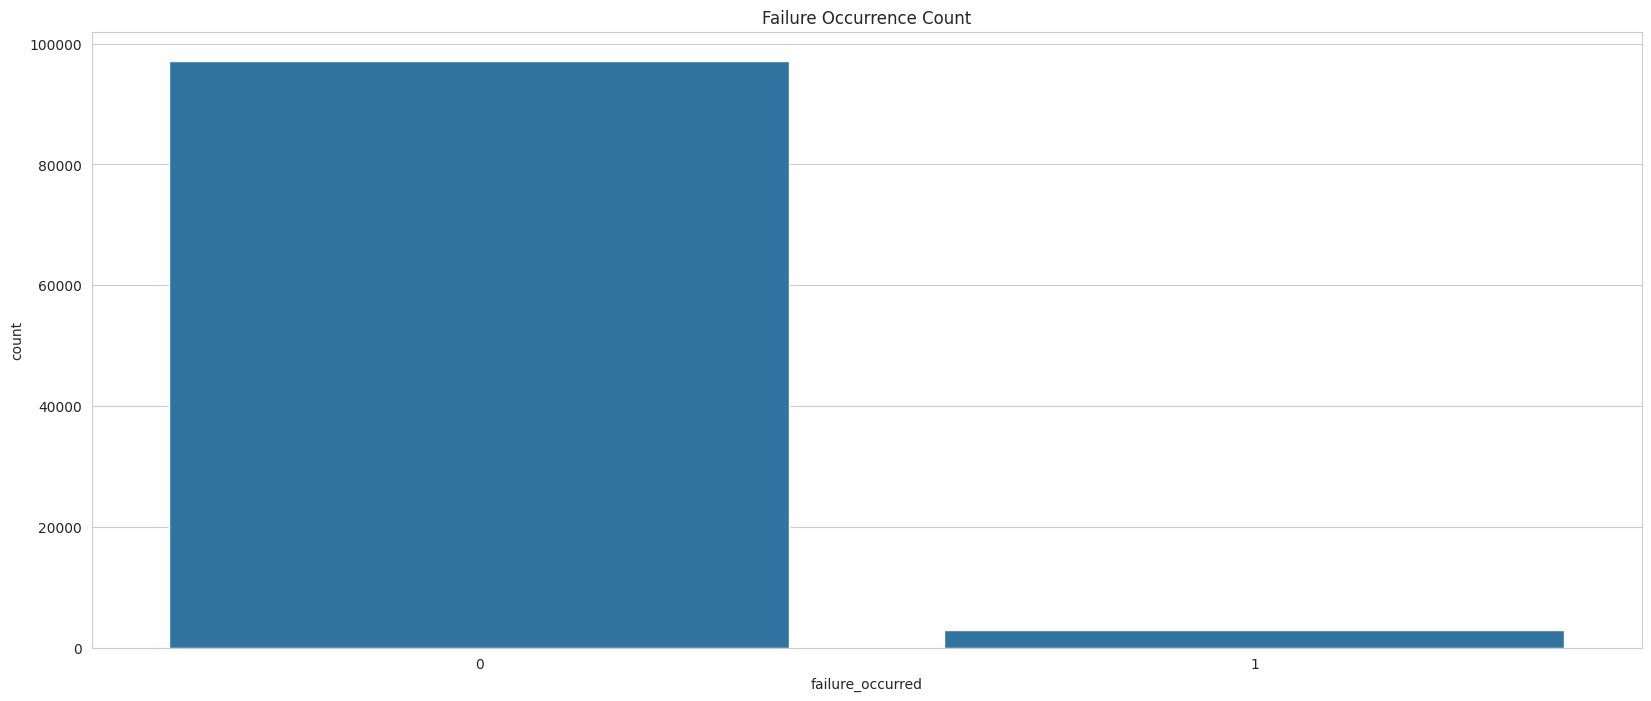

In [45]:
#Bar chrt to visualize the Number of Failure occurences
sns.set_style("whitegrid")
sns.countplot(x=df["failure_occurred"])
plt.title("Failure Occurrence Count")
plt.show()

In [46]:
df["failure_occurred"].value_counts()

,count
failure_occurred,
0,97124
1,2876


From the above,out of 1 lakh observations 69302 componenst were failed due to multiple reason

#**Training a Model**

In [47]:
#Importing Necessary data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



##Segregating the Target Variable from the features

In [48]:
X = df.drop(columns=["failure_occurred","road_type"])
y = df["failure_occurred"]
X.shape,y.shape

((100000, 4), (100000,))

##Splitting the data using Train Test method

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Model Training

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.969
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     19426
           1       0.37      0.12      0.18       574

    accuracy                           0.97     20000
   macro avg       0.67      0.56      0.58     20000
weighted avg       0.96      0.97      0.96     20000



In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19312,   114],
       [  506,    68]])

#Saving the Model

In [52]:
import pickle

In [53]:
pickle_out = open("suspension_model.pkl", mode="wb")
pickle.dump(model,pickle_out)
pickle_out.close()

In [54]:
model_pickle = open ("suspension_model.pkl","rb")
model = pickle.load(model_pickle)